In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('/content/pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-09-10 08:29:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   336MB/s    in 0.3s    

2022-09-10 08:29:34 (336 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 0 directories and 750 images in pizza_steak/train/pizza.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Sep 10 08:29 .
drwxr-xr-x 1 root root 4096 Sep 10 08:29 ..
drwxr-xr-x 4 root root 4096 Sep 10 08:29 test
drwxr-xr-x 4 root root 4096 Sep 10 08:29 train


In [ ]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')

for item in data_dir.glob('*'):
  print(item,'       ', item.name)

pizza_steak/train/steak         steak
pizza_steak/train/pizza         pizza


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class #'pizza_steak/test/pizza'
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')


In [ ]:
random.sample(os.listdir('pizza_steak/train/steak'), 1)

['2765887.jpg']

Image shape: (512, 512, 3)


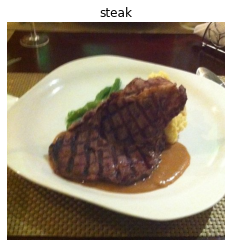

In [ ]:
img = view_random_image(target_dir= 'pizza_steak/train/',
                        target_class = 'steak')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model_1.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 123s 3s/step - loss: 0.5610 - accuracy: 0.7193 - val_loss: 0.4082 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 120s 3s/step - loss: 0.4248 - accuracy: 0.8167 - val_loss: 0.3483 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 109s 2s/step - loss: 0.3994 - accuracy: 0.8200 - val_loss: 0.3208 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 119s 3s/step - loss: 0.3939 - accuracy: 0.8220 - val_loss: 0.3730 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 109s 2s/step - loss: 0.3448 - accuracy: 0.8567 - val_loss: 0.3148 - val_accuracy: 0.8740


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model_2.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 0.8527 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
    metrics = ['accuracy']
)
history_3 = model_3.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 0.5718 - accuracy: 0.7027 - val_loss: 0.4732 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5001 - accuracy: 0.7527 - val_loss: 0.5445 - val_accuracy: 0.6960
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4744 - accuracy: 0.7807 - val_loss: 0.4498 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4393 - accuracy: 0.8053 - val_loss: 0.4471 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4410 - accuracy: 0.8027 - val_loss: 0.4170 - val_accuracy: 0.7980


In [ ]:
len(train_data)

47

Image shape: (512, 340, 3)
Image shape: (512, 512, 3)


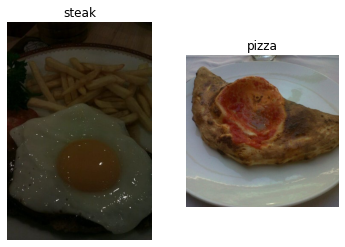

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
view_random_image('pizza_steak/train/', 'pizza')

In [ ]:
train_dir = '/content/pizza_steak/train/'
test_dir = '/content/pizza_steak/test/'


In [ ]:
!nvidia-smi

Sat Sep 10 09:18:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    33W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16563039893079866466
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2088013875530176682
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224, 224),
                                             class_mode = 'binary',
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
model_4 = Sequential([
  Conv2D(filters = 10,
         kernel_size = 3,
         strides = 1,
         padding = 'valid',
         activation = 'relu',
         input_shape = (224, 224, 3)),
  Conv2D(10, 3, activation = 'relu'),
  Conv2D(10, 3, activation = 'relu'),
  Flatten(),
  Dense(1, activation ='sigmoid')
])

In [ ]:
model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 250ms/step - loss: 3.3669 - accuracy: 0.5453 - val_loss: 0.6625 - val_accuracy: 0.5300
Epoch 2/5
47/47 [==============================] - 11s 237ms/step - loss: 0.5260 - accuracy: 0.7400 - val_loss: 0.4119 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 11s 233ms/step - loss: 0.3458 - accuracy: 0.8607 - val_loss: 0.4713 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 11s 235ms/step - loss: 0.2637 - accuracy: 0.9100 - val_loss: 0.4314 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 11s 238ms/step - loss: 0.1476 - accuracy: 0.9513 - val_loss: 0.4982 - val_accuracy: 0.7920


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 161ms/step - loss: 0.3063 - accuracy: 0.8820


[0.3062582015991211, 0.8820000290870667]

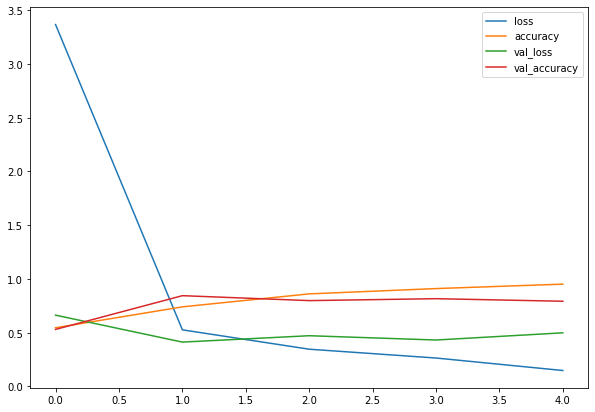

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize = (10, 7));

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  #Plot loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

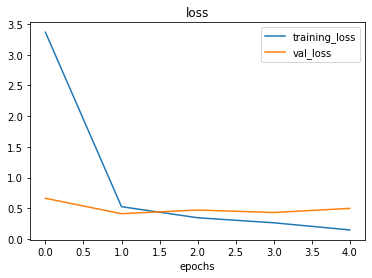

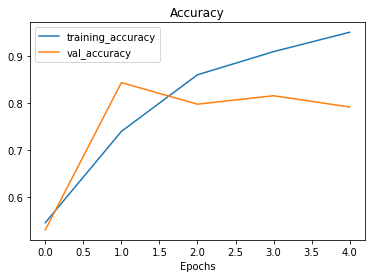

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_5 = Sequential([
  Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
  MaxPool2D(pool_size = 2),
  Conv2D(10, 3, activation = 'relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation = 'relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation ='sigmoid')
])

In [ ]:
model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [ ]:
history_5 = model_5.fit(
    train_data,
    steps_per_epoch = len(train_data),
    epochs = 5,
    validation_data = test_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6341 - accuracy: 0.6273 - val_loss: 0.4868 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4552 - accuracy: 0.7927 - val_loss: 0.3690 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4244 - accuracy: 0.8120 - val_loss: 0.3549 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3772 - accuracy: 0.8440 - val_loss: 0.3562 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3681 - accuracy: 0.8453 - val_loss: 0.3116 - val_accuracy: 0.8820


In [ ]:
len(valid_data), len(test_data)

(16, 16)

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

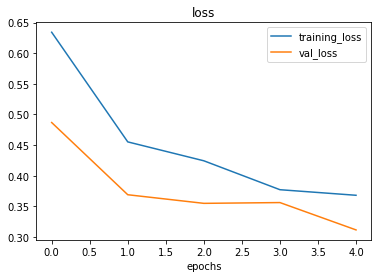

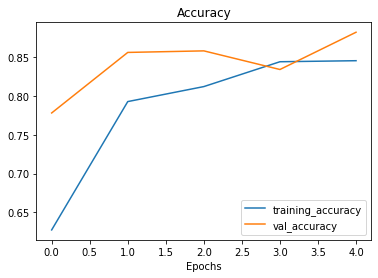

In [ ]:
plot_loss_curves(history_5)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
print("Train data augmented:")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   target_size = (224, 224),
                                                                   class_mode = 'binary',
                                                                   batch_size = 32,
                                                                   shuffle = False)

print('Non-augmented train data:')
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32,
                                               shuffle = False)


IMG_SIZE = (224, 224)
print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SIZE,
                                             class_mode = 'binary',
                                             batch_size = 32)

Train data augmented:
Found 1500 images belonging to 2 classes.
Non-augmented train data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()

augmented_images, augmented_labels = train_data_augmented.next()

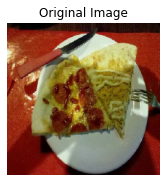

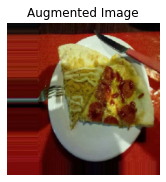

In [ ]:
import random
random_number = random.randint(1, 31)
plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.show()
plt.figure()
plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)
plt.show()

In [ ]:
model_6 = tf.keras.Sequential([
   tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = 3,
                          activation = 'relu',
                          input_shape = (224, 224, 3)),
   tf.keras.layers.MaxPool2D(pool_size= 2),
   tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = 3,
                          activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = 3,
                          activation = 'relu'),
   tf.keras.layers.MaxPool2D(2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_6 = model_6.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 535ms/step - loss: 0.7198 - accuracy: 0.4353 - val_loss: 0.6901 - val_accuracy: 0.5140
Epoch 2/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6987 - accuracy: 0.5467 - val_loss: 0.6884 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 24s 521ms/step - loss: 0.7037 - accuracy: 0.5060 - val_loss: 0.6810 - val_accuracy: 0.5760
Epoch 4/5
47/47 [==============================] - 24s 522ms/step - loss: 0.6861 - accuracy: 0.5467 - val_loss: 0.6655 - val_accuracy: 0.7040
Epoch 5/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6699 - accuracy: 0.6120 - val_loss: 0.5936 - val_accuracy: 0.7480


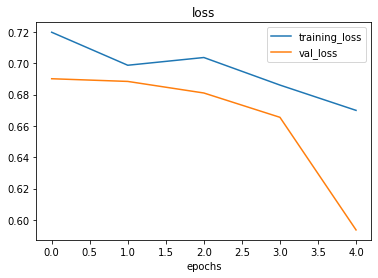

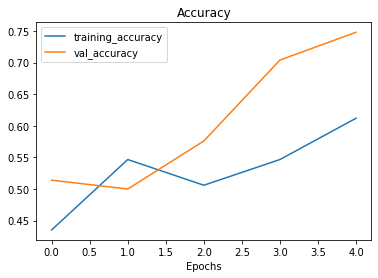

In [ ]:
plot_loss_curves(history_6)

In [ ]:
print('Augmented and Shuffled train data')
train_data_augmented_and_shuffled = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                                target_size = (224, 224),
                                                                                class_mode = 'binary')

Augmented and Shuffled train data
Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
  Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
  MaxPool2D(2),
  Conv2D(10, 3, activation = 'relu'),
  MaxPool2D(3),
  Conv2D(10, 3, activation = 'relu'),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation ='sigmoid')
])

model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_7 = model_7.fit(train_data_augmented_and_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_and_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 537ms/step - loss: 0.6772 - accuracy: 0.5920 - val_loss: 0.5888 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 25s 532ms/step - loss: 0.6071 - accuracy: 0.6687 - val_loss: 0.4912 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 25s 523ms/step - loss: 0.5202 - accuracy: 0.7507 - val_loss: 0.3815 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 24s 516ms/step - loss: 0.4884 - accuracy: 0.7853 - val_loss: 0.4411 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 25s 528ms/step - loss: 0.4630 - accuracy: 0.7867 - val_loss: 0.3421 - val_accuracy: 0.8600


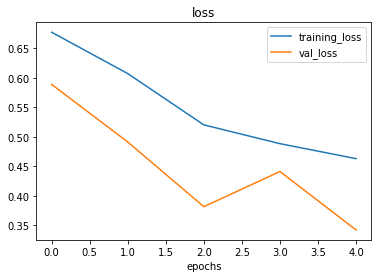

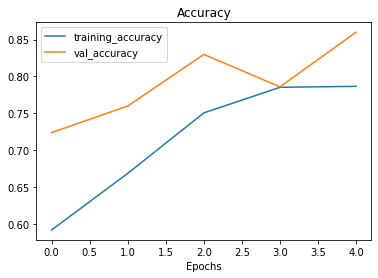

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_8 = Sequential([
  Conv2D(32, 3, activation = 'relu', input_shape = (224, 224, 3)),
  Conv2D(32, 3, activation = 'relu'),
  MaxPool2D(2),
  Conv2D(32, 3, activation = 'relu'),
  Conv2D(32, 3, activation = 'relu'),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation = 'sigmoid')
])

model_8.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_8 = model_8.fit(train_data_augmented_and_shuffled,
          epochs = 5,
          steps_per_epoch = len(train_data_augmented_and_shuffled),
          validation_data = test_data,
          validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 36s 723ms/step - loss: 0.6227 - accuracy: 0.6560 - val_loss: 0.4382 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 27s 578ms/step - loss: 0.5372 - accuracy: 0.7300 - val_loss: 0.4261 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 28s 595ms/step - loss: 0.4881 - accuracy: 0.7733 - val_loss: 0.3338 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 28s 586ms/step - loss: 0.4813 - accuracy: 0.7720 - val_loss: 0.3805 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 28s 595ms/step - loss: 0.4691 - accuracy: 0.7800 - val_loss: 0.3979 - val_accuracy: 0.8300


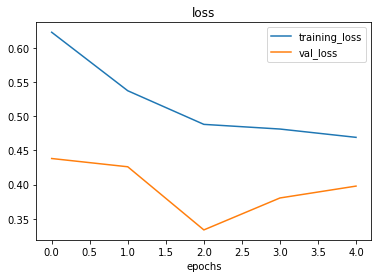

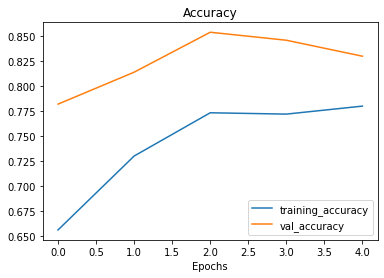

In [ ]:
plot_loss_curves(history_8)

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2022-03-07 08:28:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-03-07 08:28:31 (33.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



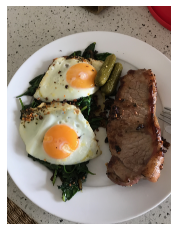

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(steak)
plt.axis(False)
plt.show()

In [ ]:
steak_norm = ImageDataGenerator(rescale = 1/255.)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
def load_and_prep_image(filename, img_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

(load_and_prep_image('03-steak.jpeg').shape)

TensorShape([224, 224, 3])

In [ ]:
'''expanded_steak = tf.expand_dims(steak, axis = 0)
expanded_steak'''

'expanded_steak = tf.expand_dims(steak, axis = 0)\nexpanded_steak'

In [ ]:
steak = load_and_prep_image('03-steak.jpeg')
pred = model_8.predict(tf.expand_dims(steak, axis = 0))

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Next time try to preprocess image with image data generator
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class =  class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

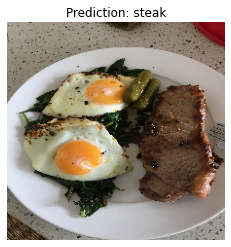

In [ ]:
pred_and_plot(model_8, '03-steak.jpeg')

In [ ]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread('03-pizza-dad.jpeg')

--2022-03-07 08:28:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-03-07 08:28:34 (40.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



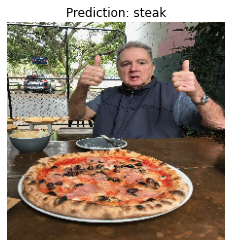

In [ ]:
pred_and_plot(model_8, '03-pizza-dad.jpeg')

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-03-07 08:28:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.234.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   209MB/s    in 2.4s    

2022-03-07 08:28:37 (209 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.
There are 10 directories and 0 ima

In [ ]:
train_dir = '/content/10_food_classes_all_data/train/'
test_dir = '/content/10_food_classes_all_data/test/'

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names


array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 512, 3)


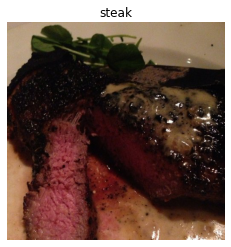

In [ ]:
import random
view_random_image(target_dir = train_dir, target_class = random.choice(class_names))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224))

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224))


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
model_1_cat = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
  tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation = 'softmax')
])

In [ ]:
model_1_cat.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0005),
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
len(train_data), len(test_data)

(235, 79)

In [ ]:
model_1_cat.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history_1_cat = model_1_cat.fit(
    train_data,
    batch_size = 32,
    epochs = 6,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [es]
)

Epoch 1/6
235/235 [==============================] - 71s 298ms/step - loss: 0.3142 - accuracy: 0.2179 - val_loss: 0.2907 - val_accuracy: 0.2916
Epoch 2/6
235/235 [==============================] - 56s 237ms/step - loss: 0.2832 - accuracy: 0.3303 - val_loss: 0.2796 - val_accuracy: 0.3424
Epoch 3/6
235/235 [==============================] - 68s 289ms/step - loss: 0.2684 - accuracy: 0.3905 - val_loss: 0.2739 - val_accuracy: 0.3704
Epoch 4/6
235/235 [==============================] - 64s 272ms/step - loss: 0.2532 - accuracy: 0.4495 - val_loss: 0.2723 - val_accuracy: 0.3676
Epoch 5/6
235/235 [==============================] - 56s 238ms/step - loss: 0.2320 - accuracy: 0.5205 - val_loss: 0.2736 - val_accuracy: 0.3788
Epoch 6/6
235/235 [==============================] - 55s 235ms/step - loss: 0.1994 - accuracy: 0.6139 - val_loss: 0.2970 - val_accuracy: 0.3508


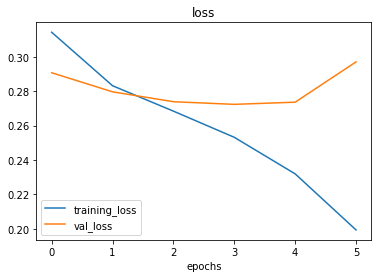

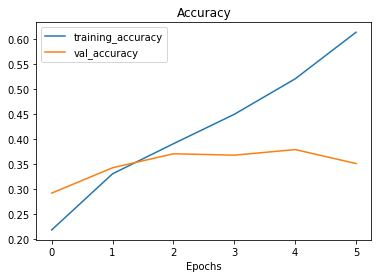

In [ ]:
plot_loss_curves(history_1_cat)

In [ ]:
model_2_cat = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224, 224, 3)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation = 'softmax')
])

model_2_cat.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model_2_cat.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 55, 55, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 53, 53, 10)        910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 10)       0         
 g2D)                                                            
                                                      

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history_2_cat = model_2_cat.fit(
    train_data,
    batch_size = 32,
    epochs = 6,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [es]
)

Epoch 1/6
235/235 [==============================] - 51s 215ms/step - loss: 0.3245 - accuracy: 0.1784 - val_loss: 0.2976 - val_accuracy: 0.2760
Epoch 2/6
235/235 [==============================] - 50s 212ms/step - loss: 0.2906 - accuracy: 0.3101 - val_loss: 0.2813 - val_accuracy: 0.3320
Epoch 3/6
235/235 [==============================] - 59s 251ms/step - loss: 0.2789 - accuracy: 0.3512 - val_loss: 0.2756 - val_accuracy: 0.3832
Epoch 4/6
235/235 [==============================] - 49s 209ms/step - loss: 0.2695 - accuracy: 0.3868 - val_loss: 0.2735 - val_accuracy: 0.3636
Epoch 5/6
235/235 [==============================] - 49s 208ms/step - loss: 0.2616 - accuracy: 0.4153 - val_loss: 0.2682 - val_accuracy: 0.3912
Epoch 6/6
235/235 [==============================] - 49s 210ms/step - loss: 0.2550 - accuracy: 0.4392 - val_loss: 0.2648 - val_accuracy: 0.3984


In [ ]:
model_2_cat.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 0.2648 - accuracy: 0.3984


[0.2648391127586365, 0.3984000086784363]

In [ ]:
plot_loss_curves(history_2_cat)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data_augmented = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224))

test_data_augmented = test_datagen.flow_from_directory(test_dir,
                                              target_size = (224, 224))


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
tf.random.set_seed(42)

model_3_cat = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
  tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
  tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation = 'softmax')
])

model_3_cat.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_3_cat = model_3_cat.fit(train_data_augmented,
                batch_size = 32,
                epochs = 5,
                steps_per_epoch = len(train_data_augmented),
                validation_data = test_data_augmented,
                validation_steps = len(test_data_augmented))

Epoch 1/10
235/235 [==============================] - 131s 549ms/step - loss: 0.3153 - accuracy: 0.2047 - val_loss: 0.2947 - val_accuracy: 0.2796
Epoch 2/10
235/235 [==============================] - 128s 546ms/step - loss: 0.2981 - accuracy: 0.2660 - val_loss: 0.2858 - val_accuracy: 0.3180
Epoch 3/10
235/235 [==============================] - 129s 551ms/step - loss: 0.2920 - accuracy: 0.2984 - val_loss: 0.2744 - val_accuracy: 0.3588
Epoch 4/10
235/235 [==============================] - 128s 544ms/step - loss: 0.2876 - accuracy: 0.3157 - val_loss: 0.2661 - val_accuracy: 0.4020
Epoch 5/10
235/235 [==============================] - 128s 544ms/step - loss: 0.2840 - accuracy: 0.3333 - val_loss: 0.2651 - val_accuracy: 0.3980
Epoch 6/10
235/235 [==============================] - 129s 547ms/step - loss: 0.2805 - accuracy: 0.3499 - val_loss: 0.2641 - val_accuracy: 0.3980
Epoch 7/10
235/235 [==============================] - 129s 547ms/step - loss: 0.2780 - accuracy: 0.3552 - val_loss: 0.2642 -

In [ ]:
###Shoud have use this instead of rewriting whole model
#tf.keras.models.clone_model(name of the model name we want to copy )

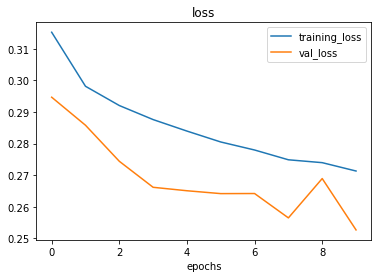

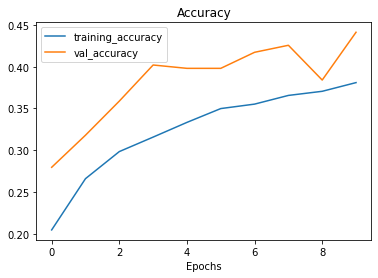

In [ ]:
plot_loss_curves(history_3_cat)

In [ ]:
model_3_cat.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 0.2526 - accuracy: 0.4412


[0.2526494264602661, 0.44119998812675476]

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-03-07 09:01:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.07s   

2022-03-07 09:01:21 (52.3 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-03-07 09:01:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting res

In [ ]:
  img = tf.io.read_file("03-hamburger.jpeg")
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [224, 224])
  img = img/255.
  img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.        , 0.        , 0.07553022],
        [0.        , 0.        , 0.04705882],
        [0.        , 0.        , 0.07843138],
        ...,
        [0.5734096 , 0.6479194 , 0.7028214 ],
        [0.56816983, 0.6437612 , 0.7104279 ],
        [0.5953191 , 0.6423779 , 0.7286524 ]],

       [[0.        , 0.        , 0.06642658],
        [0.        , 0.0012605 , 0.05756303],
        [0.00784314, 0.        , 0.05490196],
        ...,
        [0.5628868 , 0.62563187, 0.67661226],
        [0.5736749 , 0.61753327, 0.6940843 ],
        [0.5750908 , 0.6182281 , 0.6888163 ]],

       [[0.00392157, 0.        , 0.03025207],
        [0.0060224 , 0.00228091, 0.03347338],
        [0.02140858, 0.00156062, 0.05672269],
        ...,
        [0.57314974, 0.6120481 , 0.637697  ],
        [0.5588153 , 0.6176388 , 0.6397704 ],
        [0.53857887, 0.60806525, 0.6533416 ]],

       ...,

       [[0.33485377, 0.21820688, 0.06868719],
        [0.35

In [ ]:
pred = model_3_cat.predict(tf.expand_dims(img, axis = 0))

In [ ]:
class_names[tf.math.argmax(
    pred, axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


'hamburger'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))

  if len(pred[0]) > 1:
    pred_class =  class_names[tf.math.argmax(pred, axis=1)]
  else:
    pred_class = class_names[tf.int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


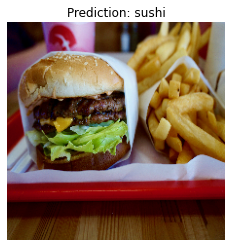

In [ ]:
pred_and_plot(model = model_3_cat,
              filename = '03-hamburger.jpeg',
              class_names= (class_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


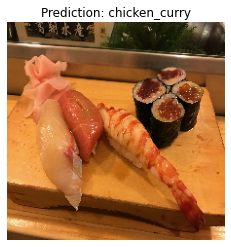

In [ ]:
pred_and_plot(model = model_3_cat,
              filename = '03-sushi.jpeg',
              class_names= (class_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


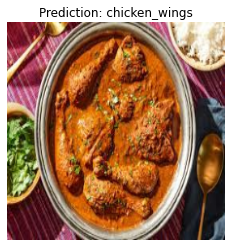

In [ ]:
pred_and_plot(model = model_3_cat,
              filename = 'chicken curry.jpg',
              class_names= (class_names))

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
model_3_cat.save("Categorical classification model")

INFO:tensorflow:Assets written to: Categorical classification model/assets


In [ ]:
loaded_model = tf.keras.models.load_model('Categorical classification model')
loaded_model.evaluate(test_data)

79/79 [==============================] - 13s 162ms/step - loss: 0.2526 - accuracy: 0.4412


[0.2526494264602661, 0.44119998812675476]

In [ ]:
!nvidia

/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
%cd /kaggle/input/food-101/

[Errno 2] No such file or directory: '/kaggle/input/food-101/'
/content
